In [14]:
import pandas as pd
# loding the Zoo datset
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


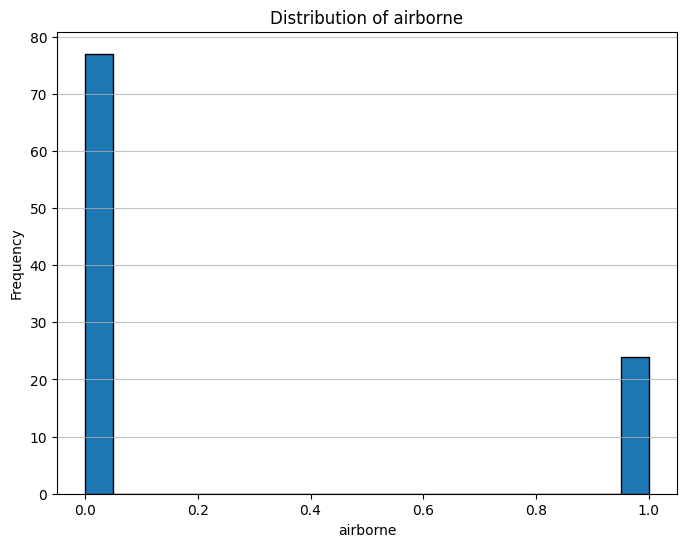

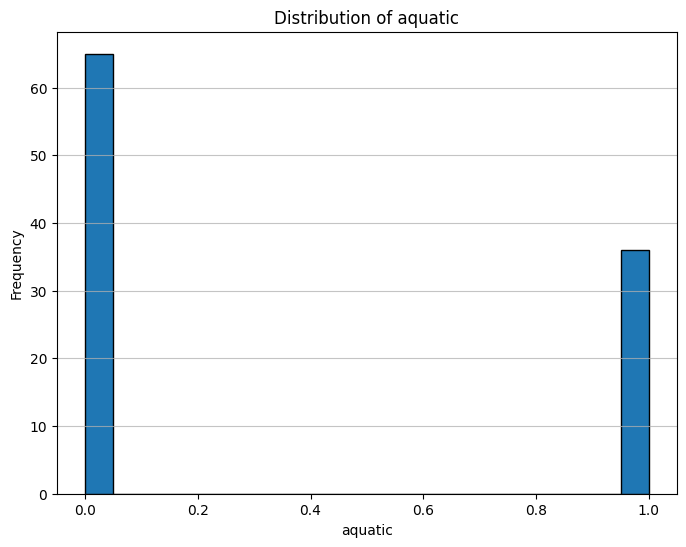

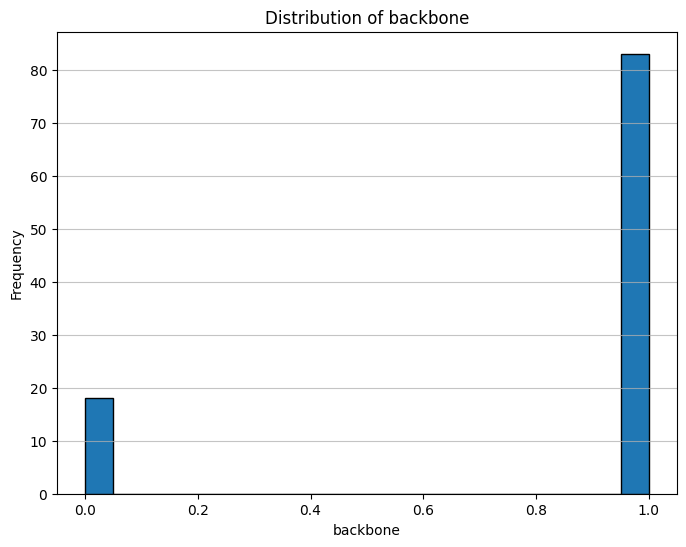

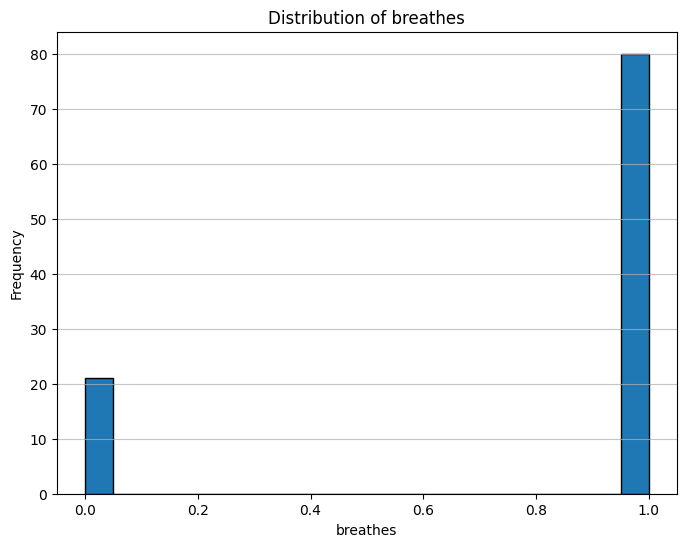

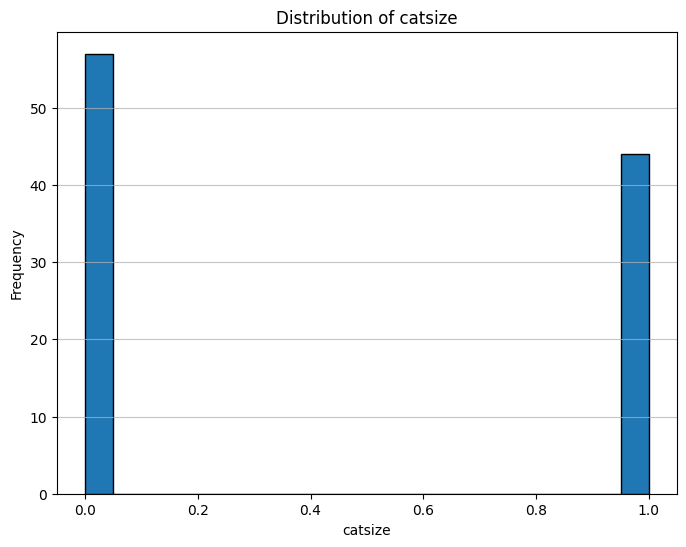

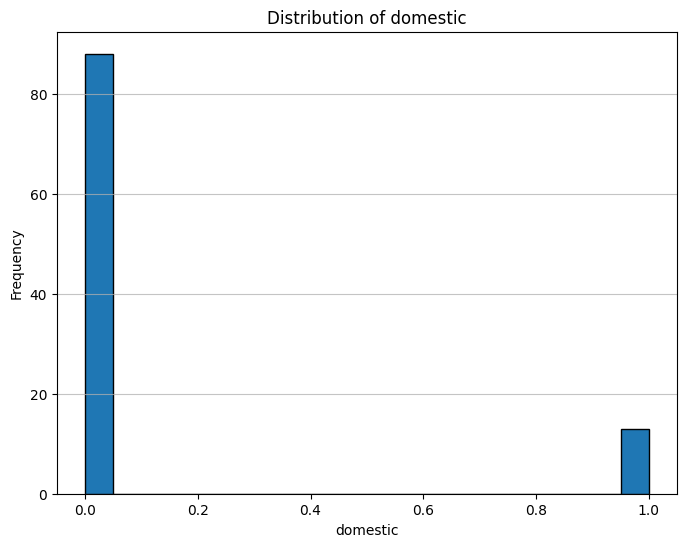

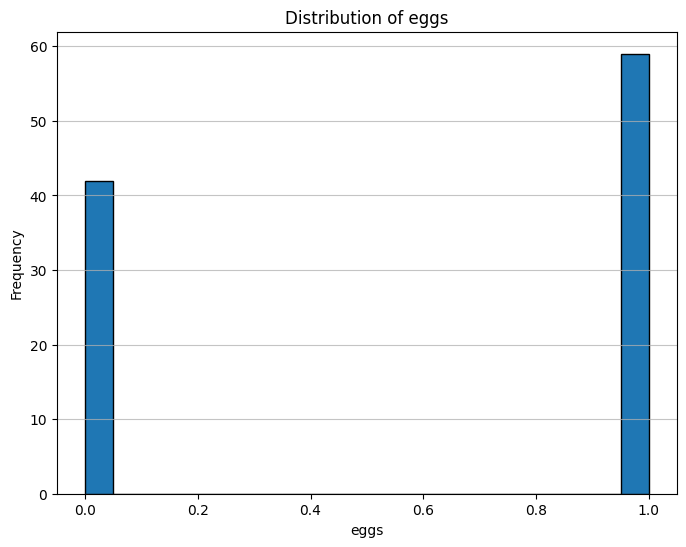

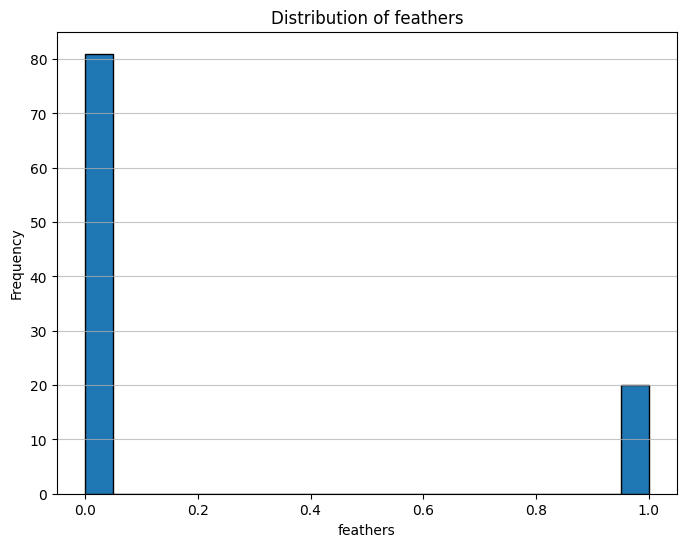

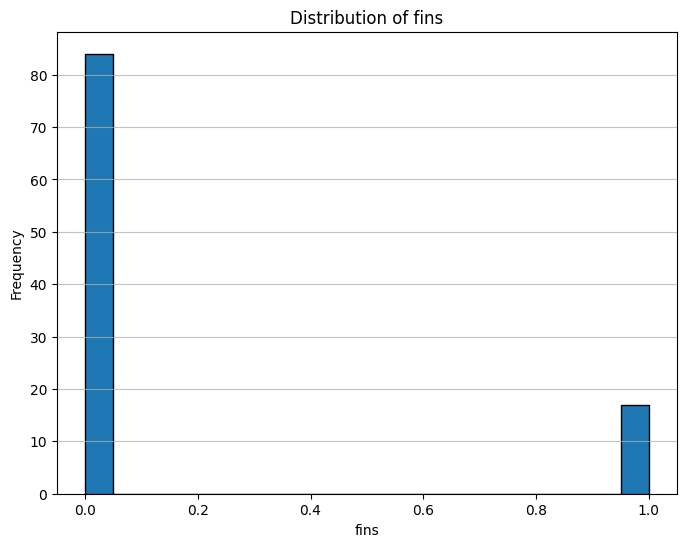

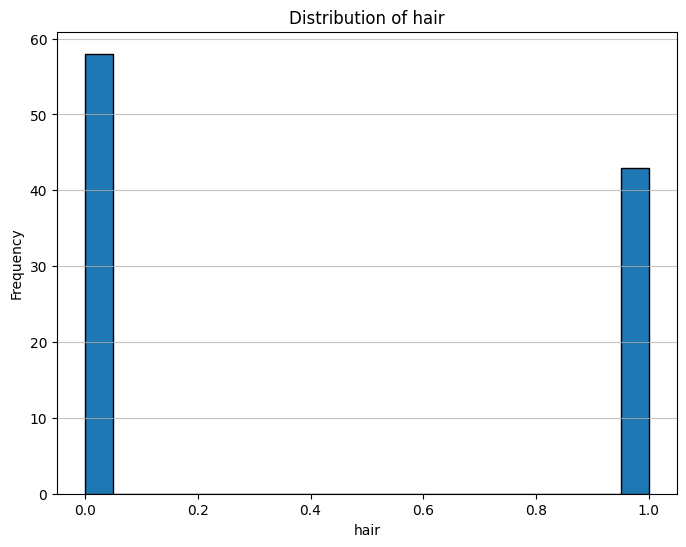

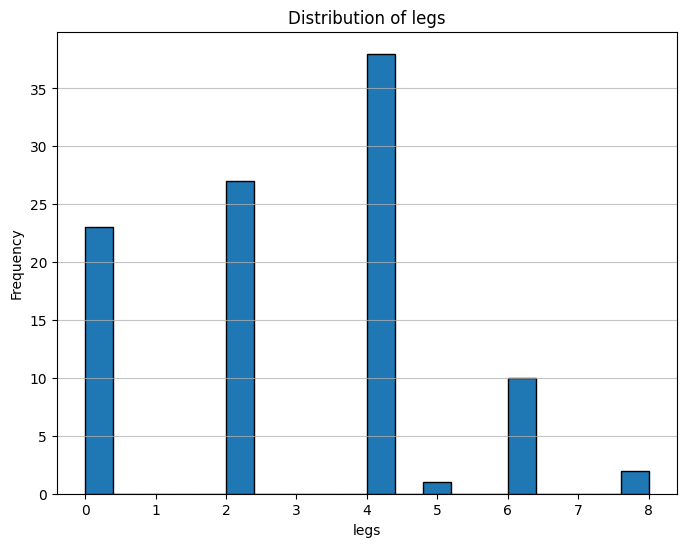

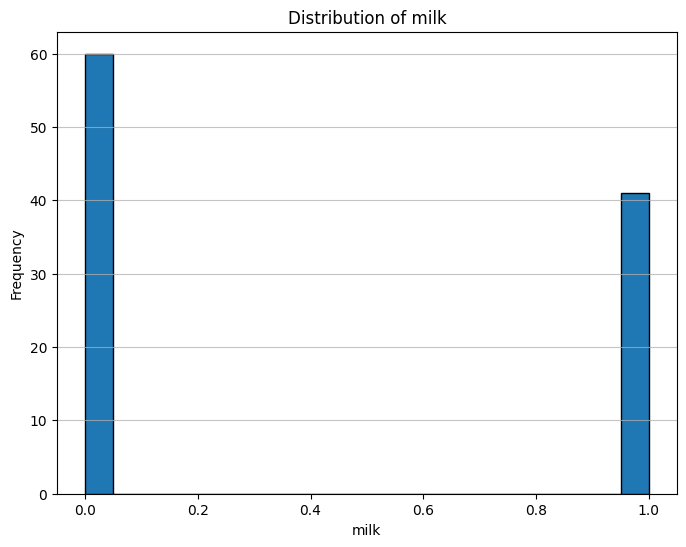

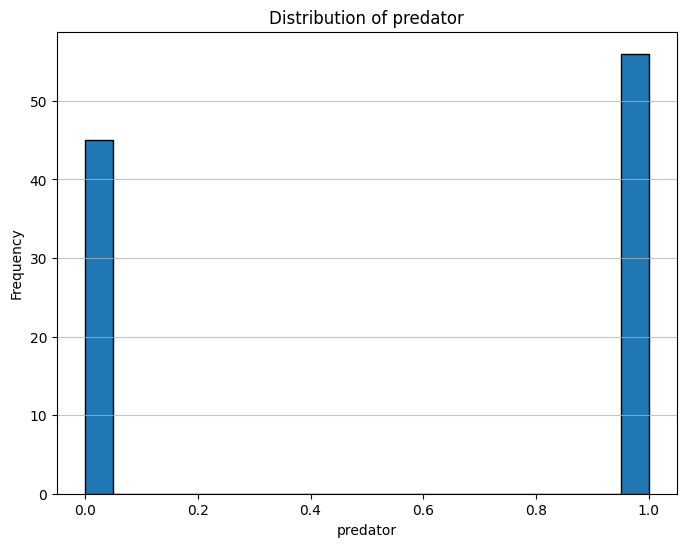

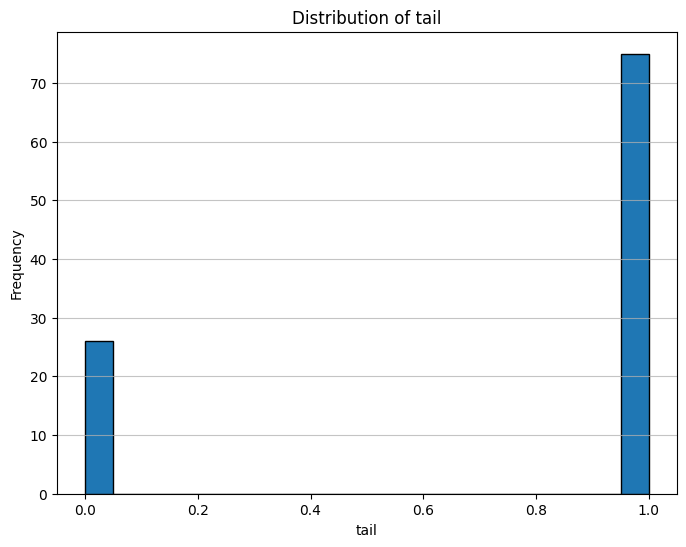

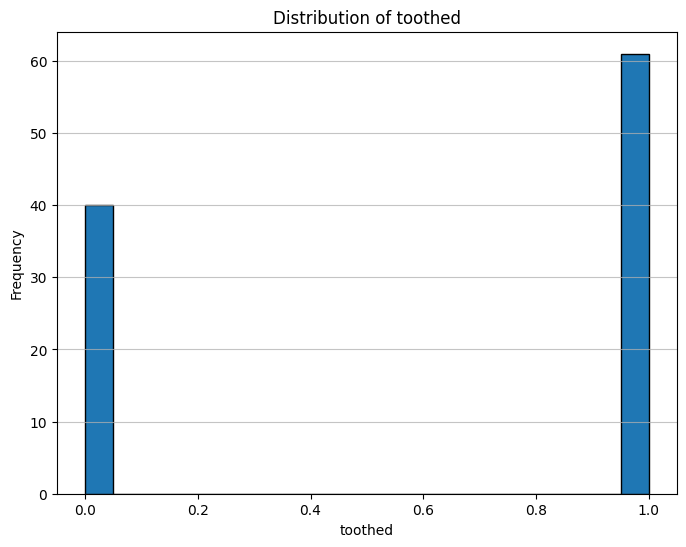

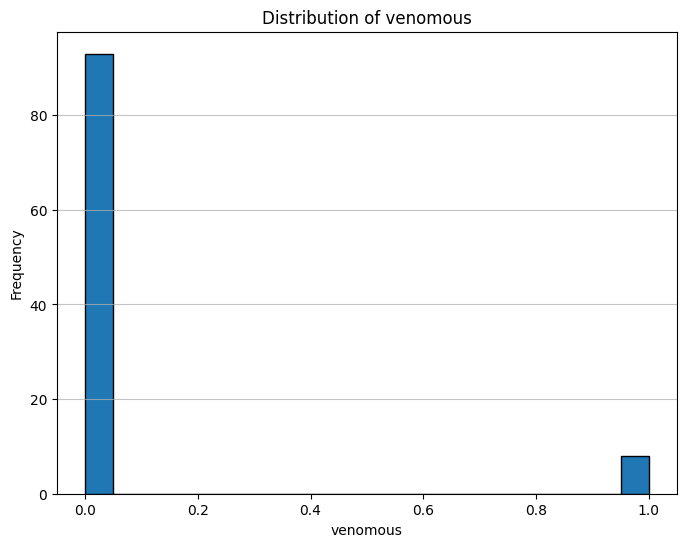

In [16]:
# Analyzing the data using the visualizations
import matplotlib.pyplot as plt

# Get the list of columns to visualize, excluding 'animal name' and 'type'
columns_to_visualize = df.columns.difference(['animal name', 'type'])

# Iterate through the selected columns and plot histograms
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

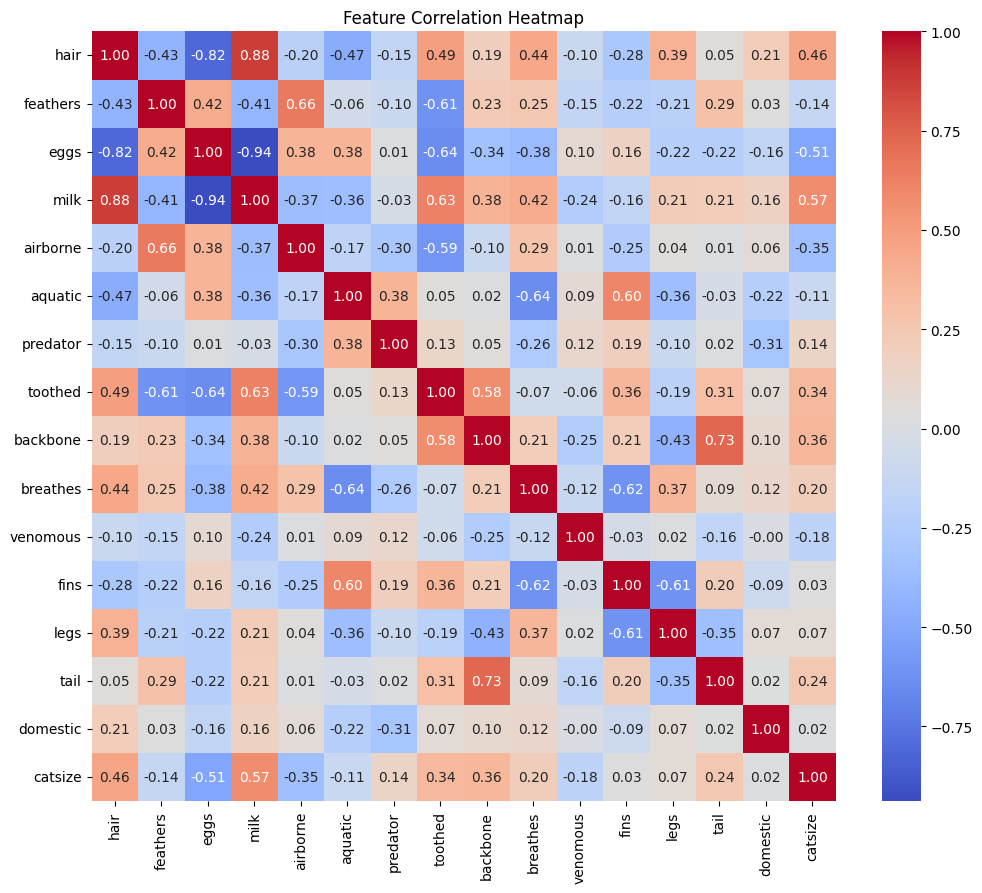

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix, excluding 'animal name' and 'type'
correlation_matrix = df.drop(['animal name', 'type'], axis=1).corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

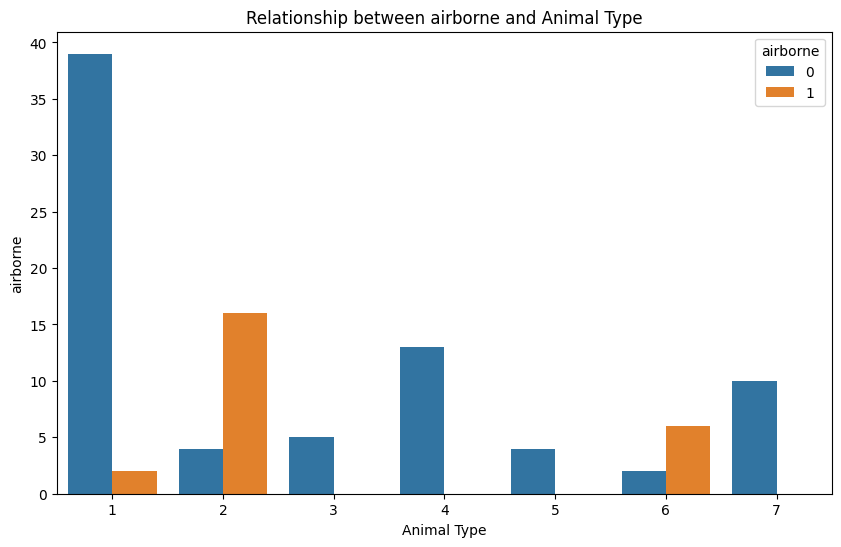

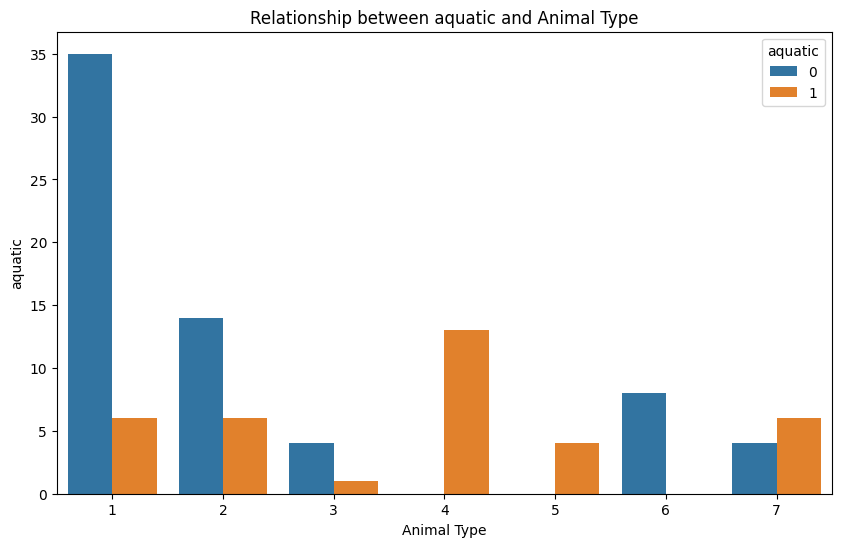

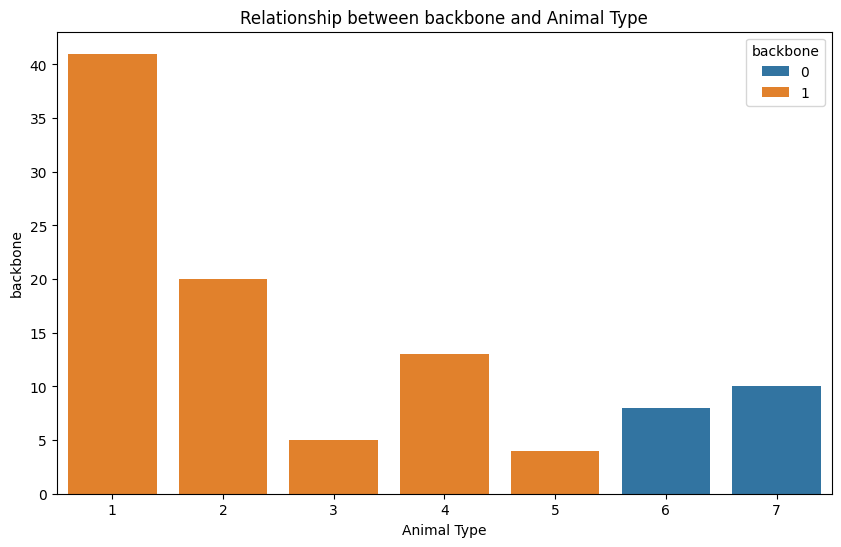

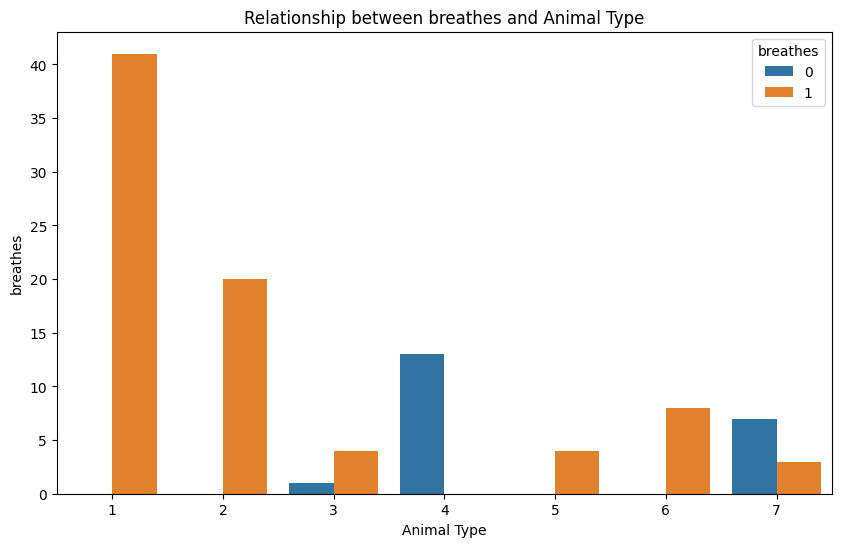

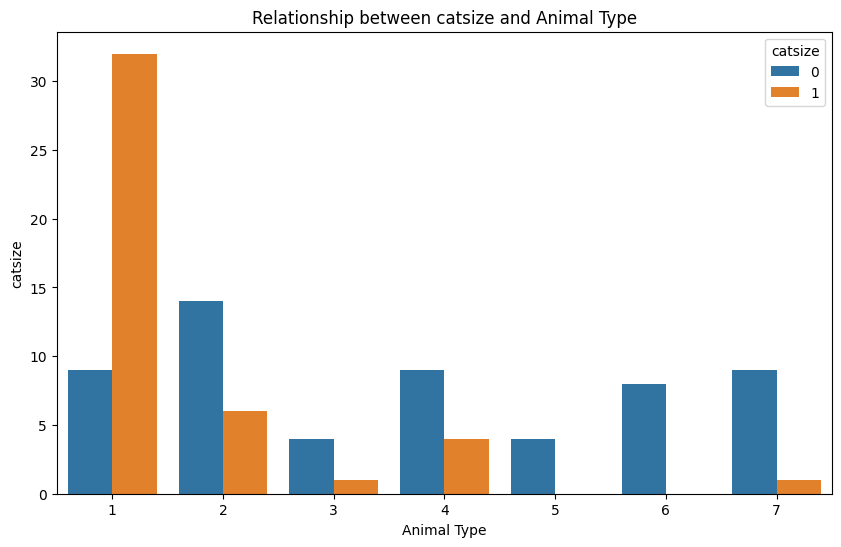

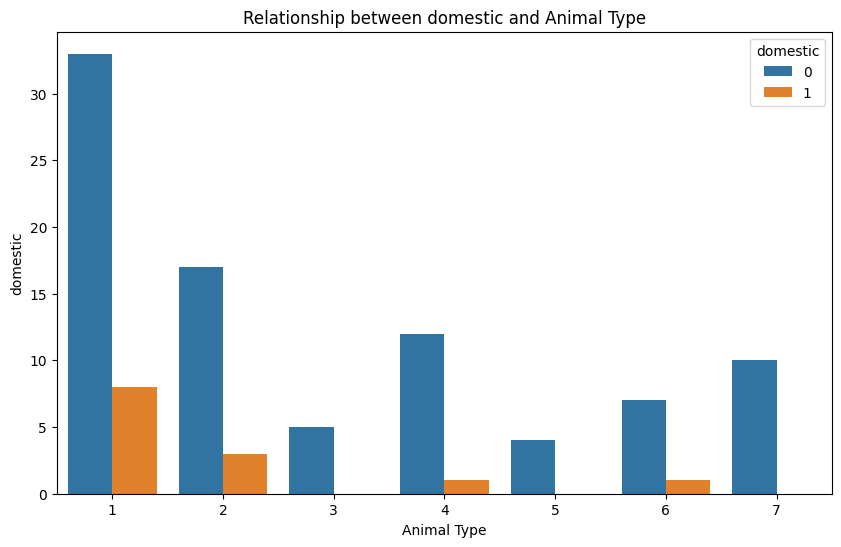

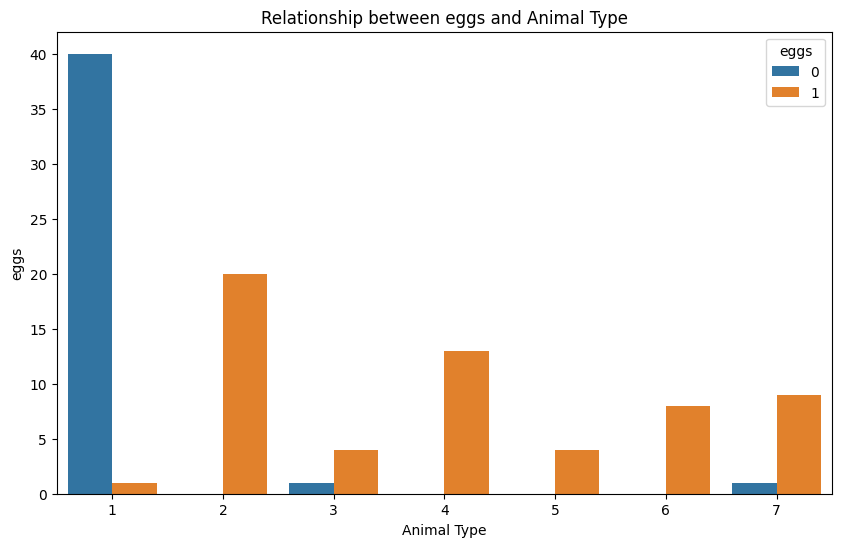

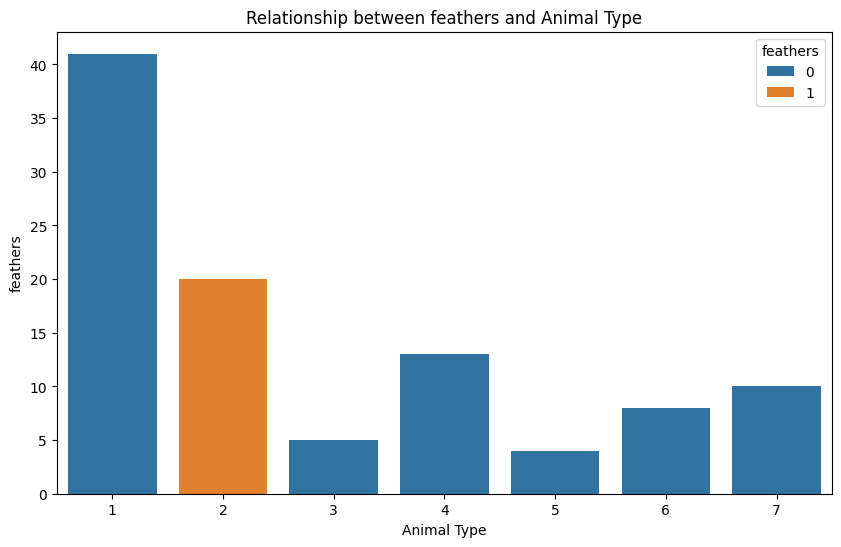

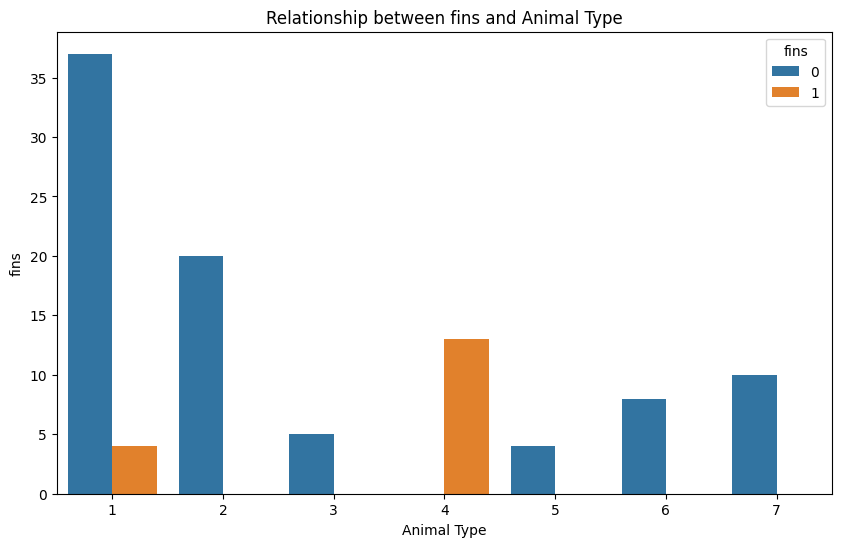

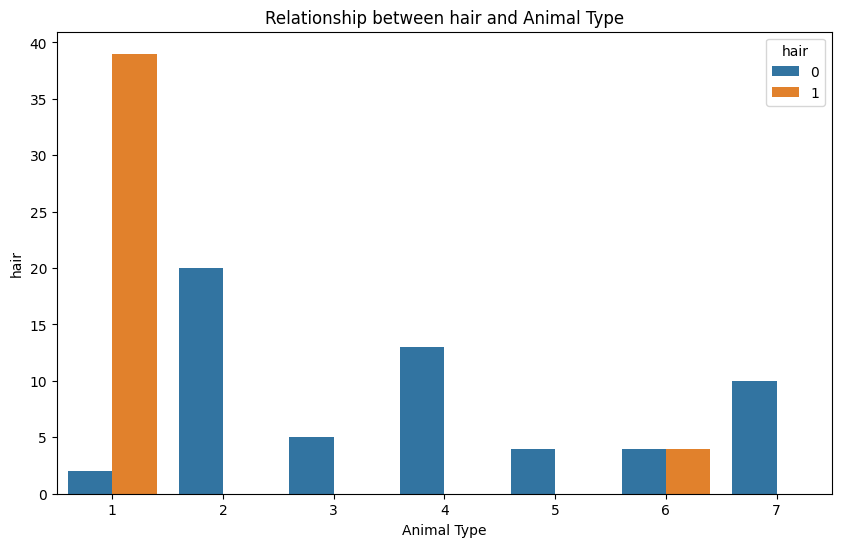

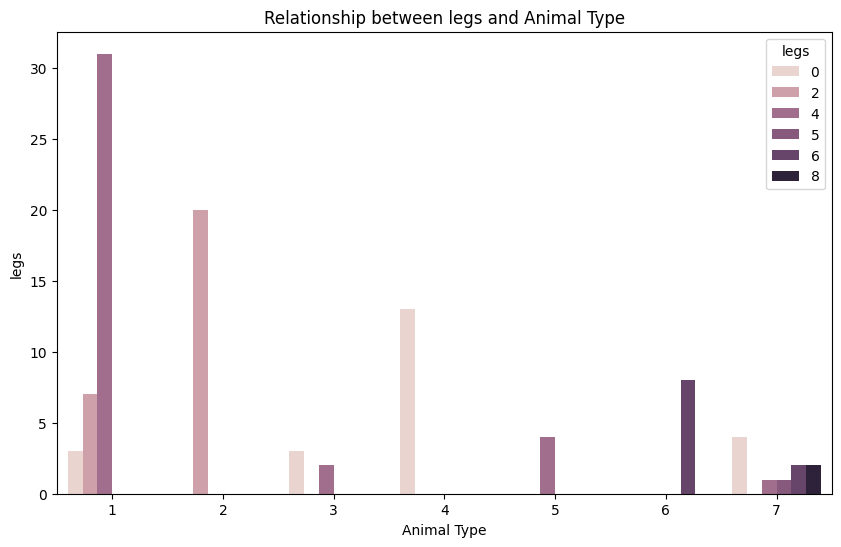

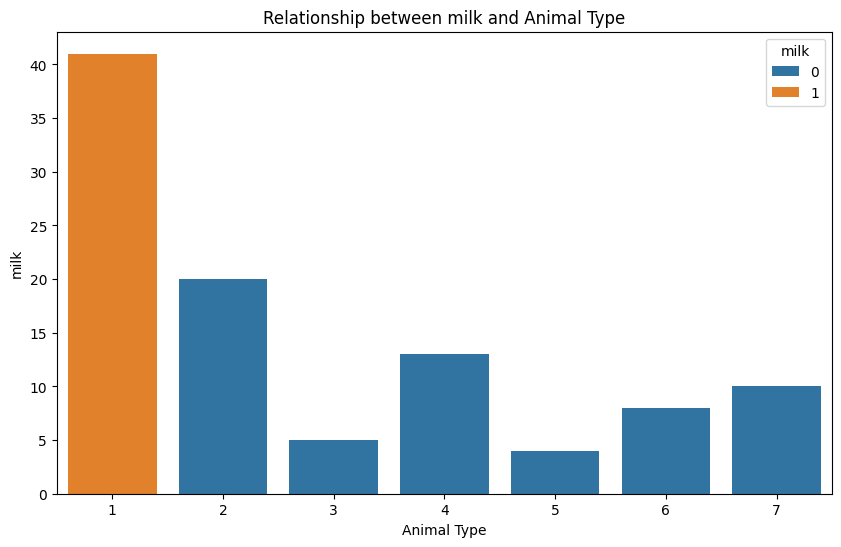

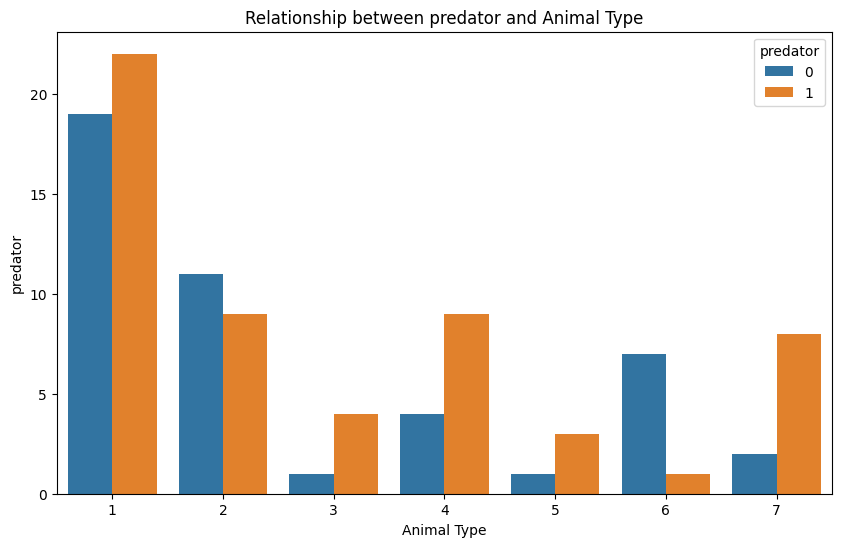

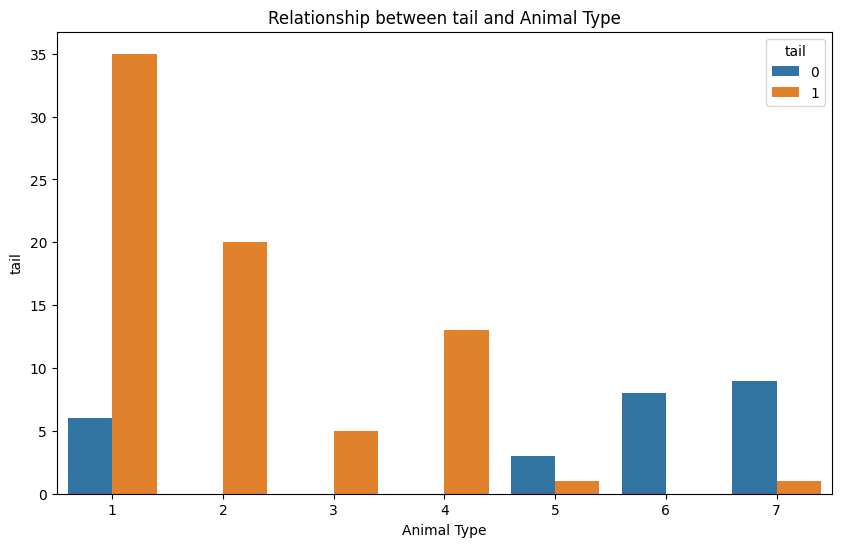

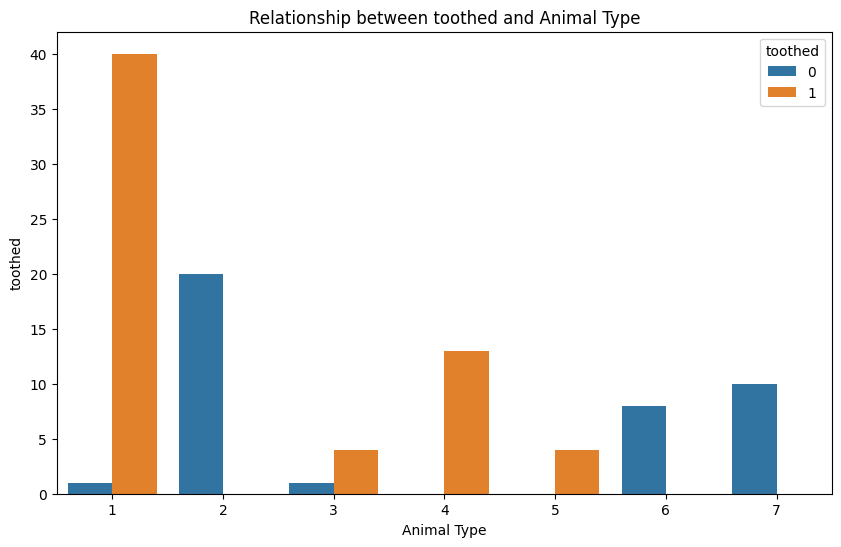

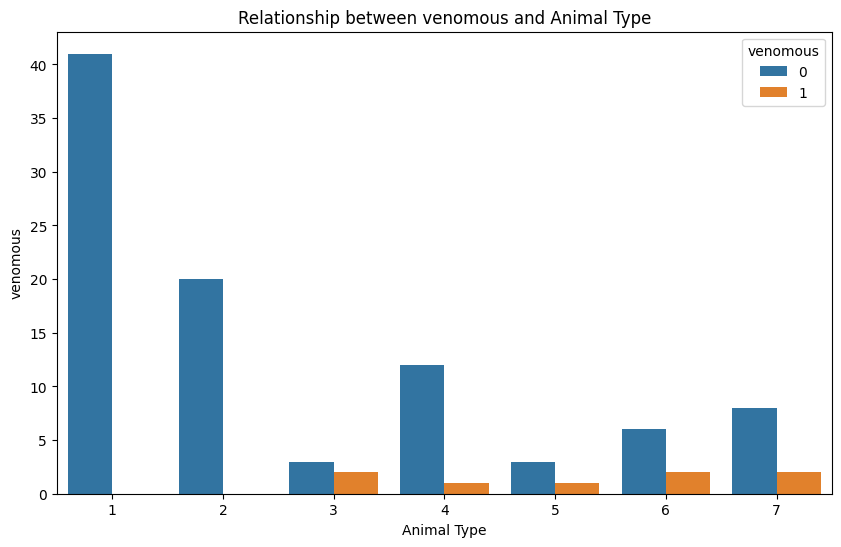

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features excluding 'animal name' and 'type'
features = df.columns.difference(['animal name', 'type'])

# Iterate through features and create plots against 'type'
for feature in features:
    plt.figure(figsize=(10, 6))
    if df[feature].nunique() > 10: # Heuristic to check if numerical
         sns.boxplot(x='type', y=feature, data=df)
    else: # Assume categorical if few unique values
        sns.countplot(x='type', hue=feature, data=df)
    plt.title(f'Relationship between {feature} and Animal Type')
    plt.xlabel('Animal Type')
    plt.ylabel(feature)
    plt.show()

In [18]:
# Preprocessing the data by handling missing values & Outliers, if any
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


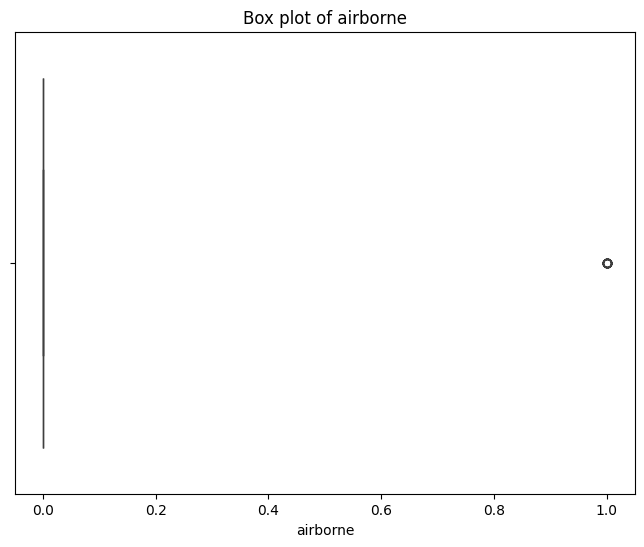

Outliers detected in 'airborne':


,animal name,airborne
11,chicken,1
16,crow,1
20,dove,1
21,duck,1
23,flamingo,1
27,fruitbat,1
30,gnat,1
33,gull,1
37,hawk,1
39,honeybee,1


Removed 24 outliers from 'airborne'.


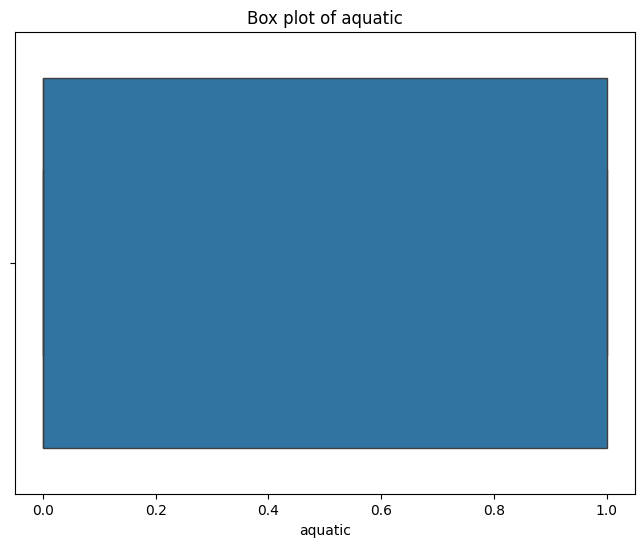

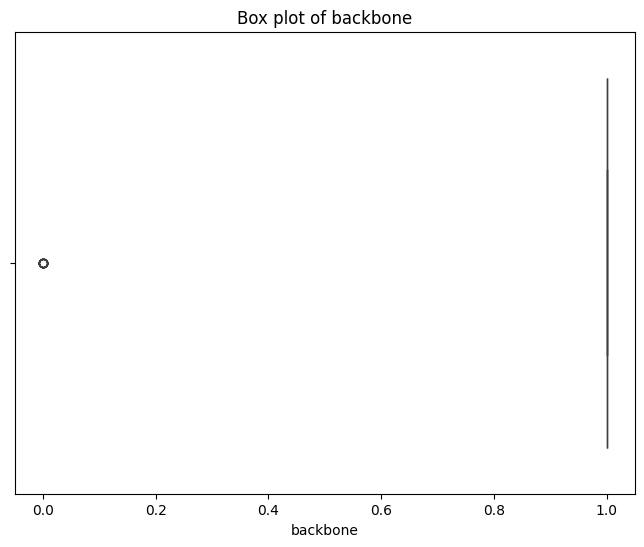

Outliers detected in 'backbone':


,animal name,backbone
13,clam,0
14,crab,0
15,crayfish,0
24,flea,0
46,lobster,0
53,octopus,0
72,scorpion,0
77,seawasp,0
81,slug,0
85,starfish,0


Removed 12 outliers from 'backbone'.


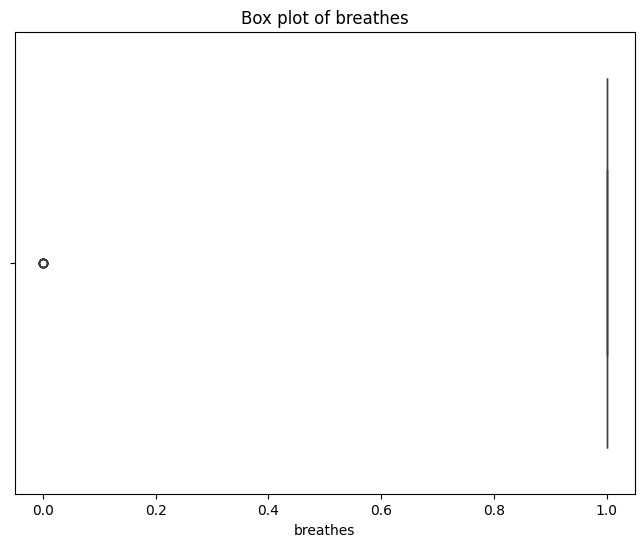

Outliers detected in 'breathes':


,animal name,breathes
2,bass,0
7,carp,0
8,catfish,0
12,chub,0
18,dogfish,0
34,haddock,0
38,herring,0
60,pike,0
61,piranha,0
73,seahorse,0


Removed 14 outliers from 'breathes'.


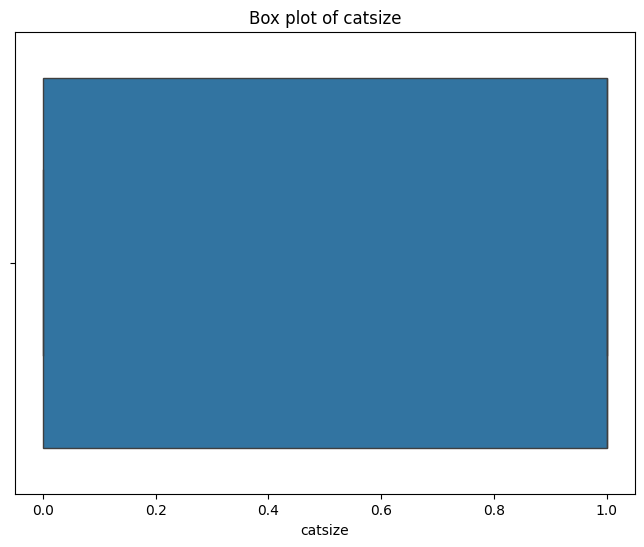

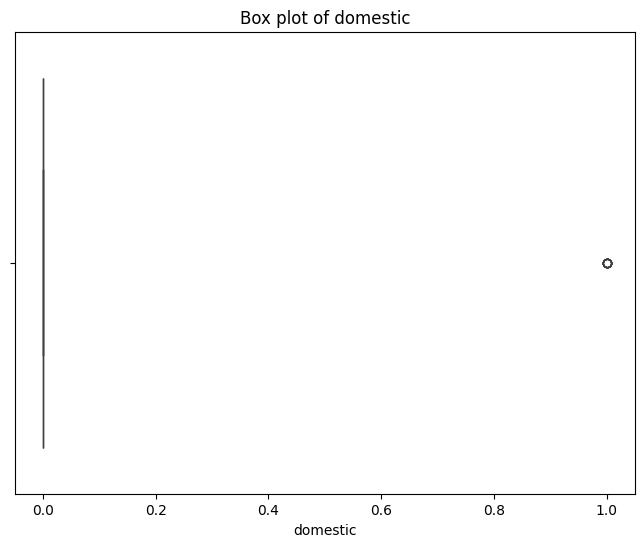

Outliers detected in 'domestic':


,animal name,domestic
6,calf,1
9,cavy,1
29,girl,1
31,goat,1
35,hamster,1
65,pony,1
68,pussycat,1
70,reindeer,1


Removed 8 outliers from 'domestic'.


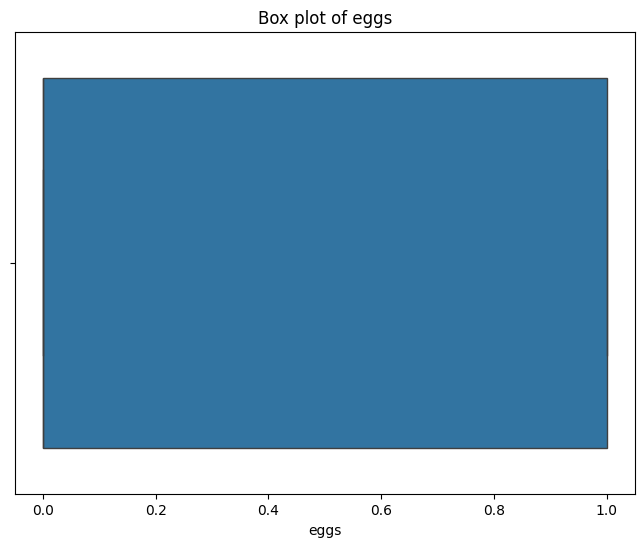

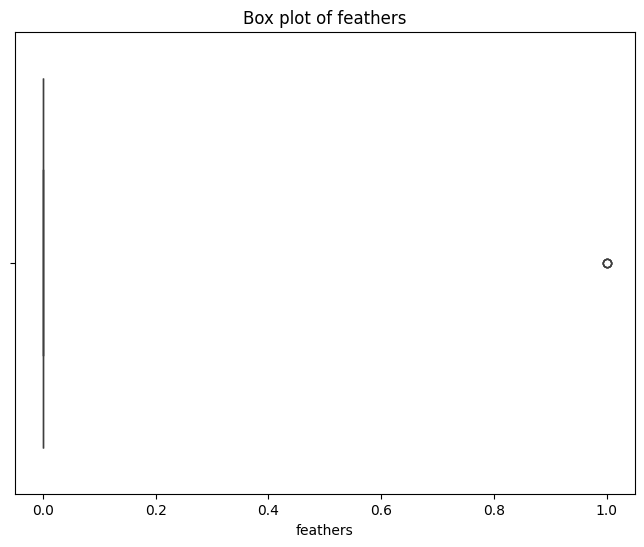

Outliers detected in 'feathers':


,animal name,feathers
41,kiwi,1
56,ostrich,1
58,penguin,1
71,rhea,1


Removed 4 outliers from 'feathers'.


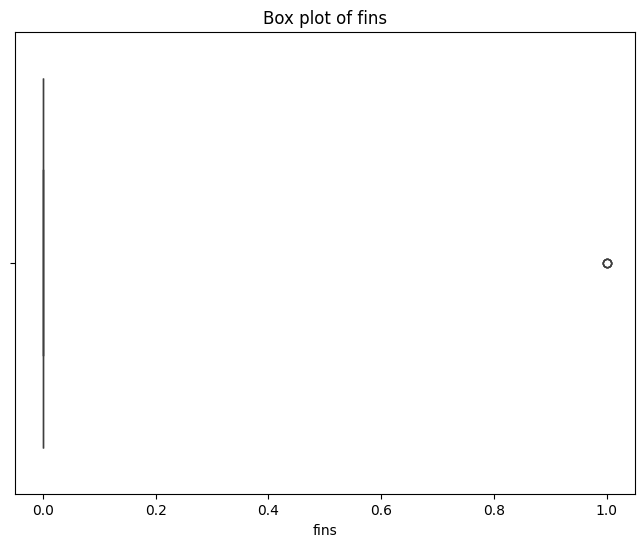

Outliers detected in 'fins':


,animal name,fins
19,dolphin,1
66,porpoise,1
74,seal,1
75,sealion,1


Removed 4 outliers from 'fins'.


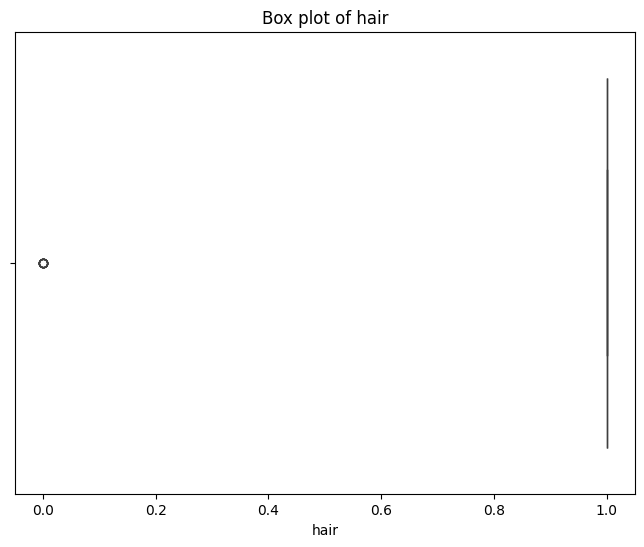

Outliers detected in 'hair':


,animal name,hair
25,frog,0
26,frog,0
52,newt,0
62,pitviper,0
80,slowworm,0
89,toad,0
90,tortoise,0
91,tuatara,0


Removed 8 outliers from 'hair'.


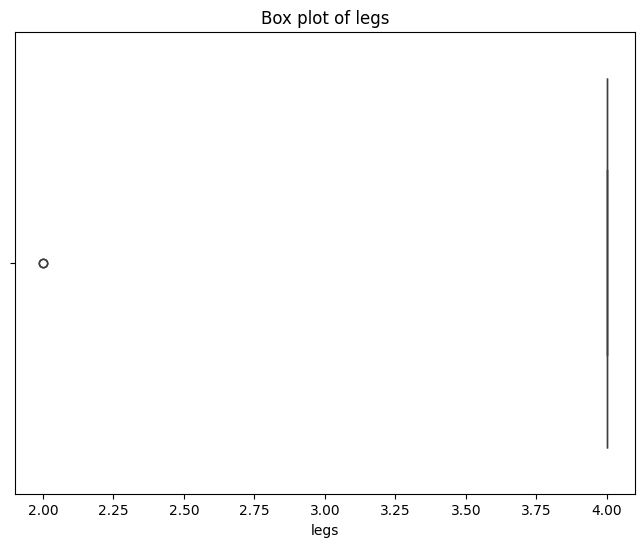

Outliers detected in 'legs':


,animal name,legs
32,gorilla,2
84,squirrel,2
96,wallaby,2


Removed 3 outliers from 'legs'.


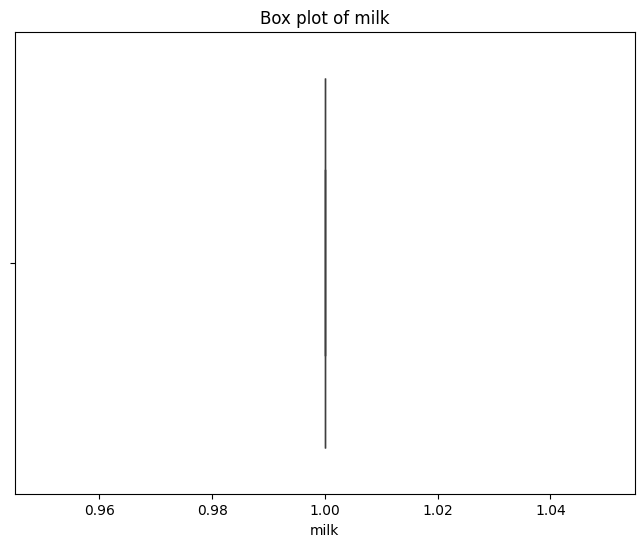

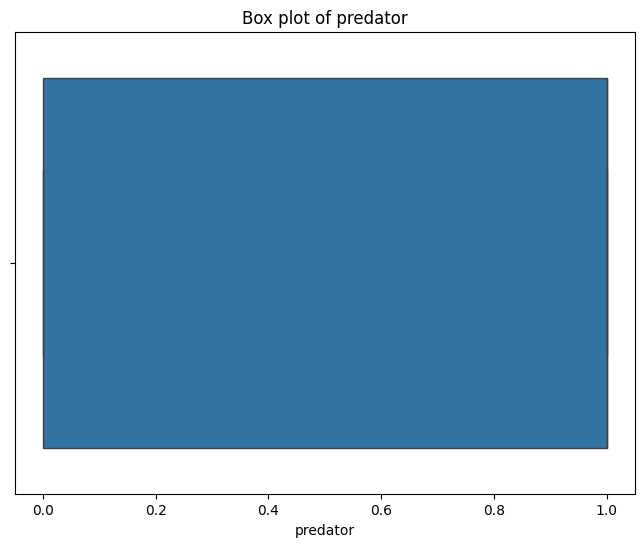

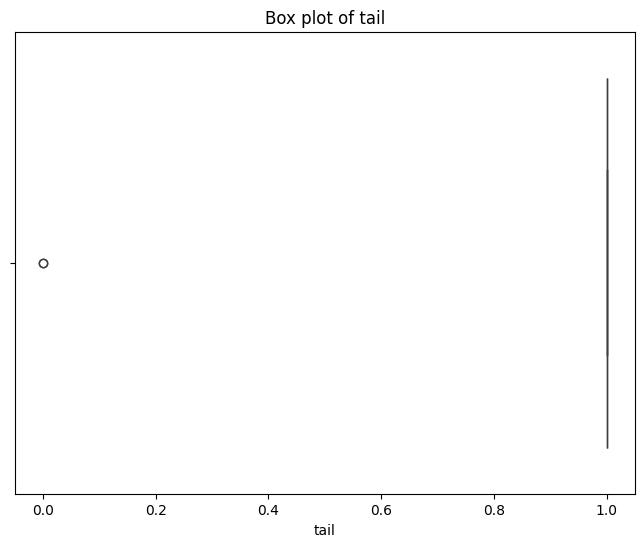

Outliers detected in 'tail':


,animal name,tail
0,aardvark,0
3,bear,0


Removed 2 outliers from 'tail'.


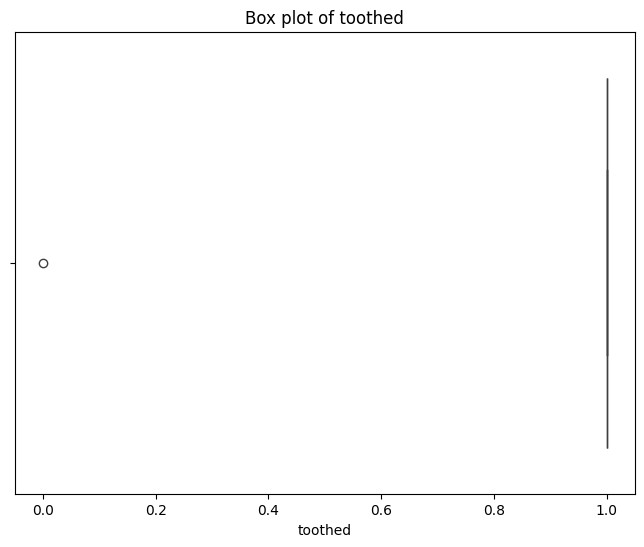

Outliers detected in 'toothed':


,animal name,toothed
63,platypus,0


Removed 1 outliers from 'toothed'.


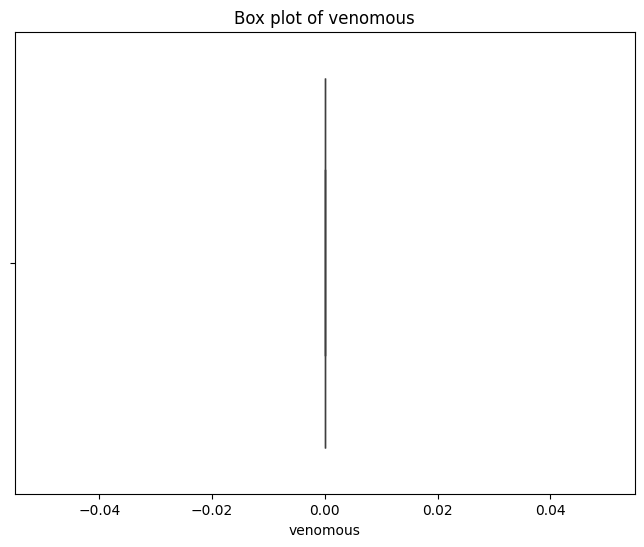

In [19]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.difference(['animal name', 'type'])

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

    # Outlier handling using IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers detected in '{feature}':")
        display(outliers[['animal name', feature]])
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
        print(f"Removed {len(outliers)} outliers from '{feature}'.")


In [21]:
# Spliting the dataset into training and testing sets (80% training, 20% testing).
from sklearn.model_selection import train_test_split

# Define features (X) and target (y), excluding 'animal name'
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16, 16)
Testing set shape: (5, 16)


In [23]:
# Implementing the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
#  Evaluating the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use weighted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted for multiclass

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [25]:
#  Visualizing the decision boundaries of the classifier.
from sklearn.decomposition import PCA

if X_train.shape[1] > 2:
    pca = PCA(n_components=2, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("Dimensionality reduced to 2 components using PCA.")
else:
    X_train_pca = X_train.values
    X_test_pca = X_test.values
    print("Dimensionality not reduced as the number of features is not greater than 2.")


Dimensionality reduced to 2 components using PCA.


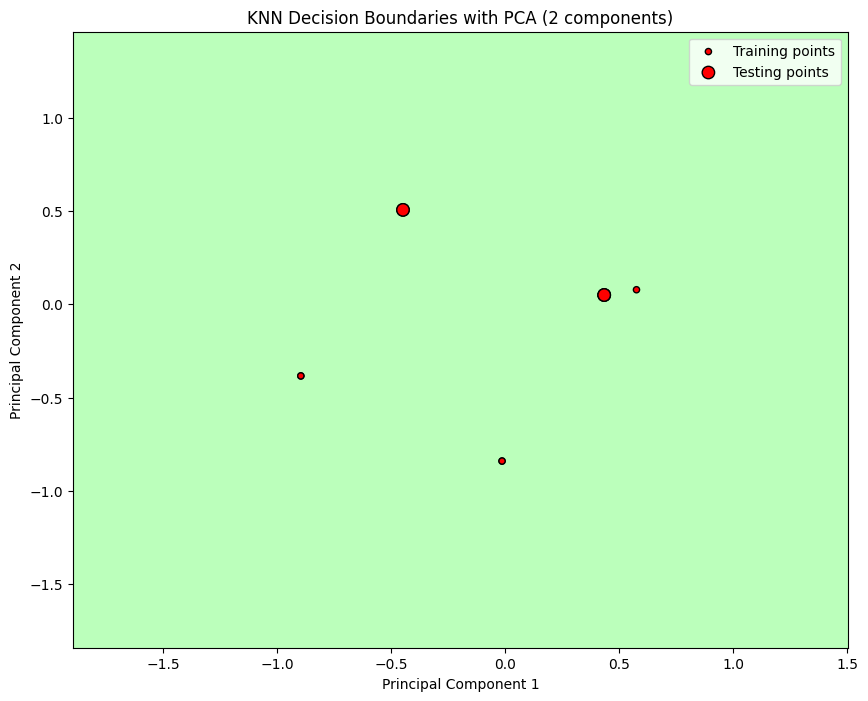

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Convert the PCA transformed data back to DataFrames for easier plotting
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2'])

# Re-train the KNN model on the PCA-transformed training data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)


# Create a meshgrid for plotting the decision boundaries
x_min, x_max = X_train_pca_df['PCA1'].min() - 1, X_train_pca_df['PCA1'].max() + 1
y_min, y_max = X_train_pca_df['PCA2'].min() - 1, X_train_pca_df['PCA2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a colormap for the decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFCC', '#CCFFCC', '#CCCCFF', '#FFCCCC'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FF00', '#0000FF', '#FF0000'])

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the training and testing points
plt.scatter(X_train_pca_df['PCA1'], X_train_pca_df['PCA2'], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Training points')
plt.scatter(X_test_pca_df['PCA1'], X_test_pca_df['PCA2'], c=y_test, cmap=cmap_bold, edgecolor='k', s=80, label='Testing points')

plt.title("KNN Decision Boundaries with PCA (2 components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [27]:
# Combine training and testing PCA data to get the overall range
X_combined_pca = np.vstack((X_train_pca, X_test_pca))

# Define the minimum and maximum values for the x-axis (PCA1) and y-axis (PCA2)
x_min, x_max = X_combined_pca[:, 0].min() - 1, X_combined_pca[:, 0].max() + 1
y_min, y_max = X_combined_pca[:, 1].min() - 1, X_combined_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [28]:
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

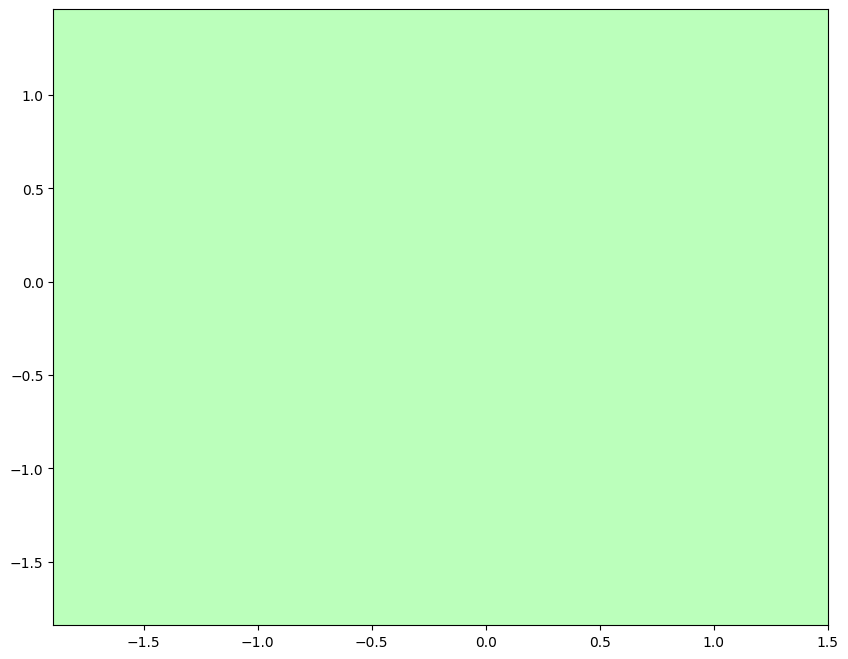

In [29]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFCC', '#CCFFCC', '#CCCCFF', '#FFCCCC'])

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

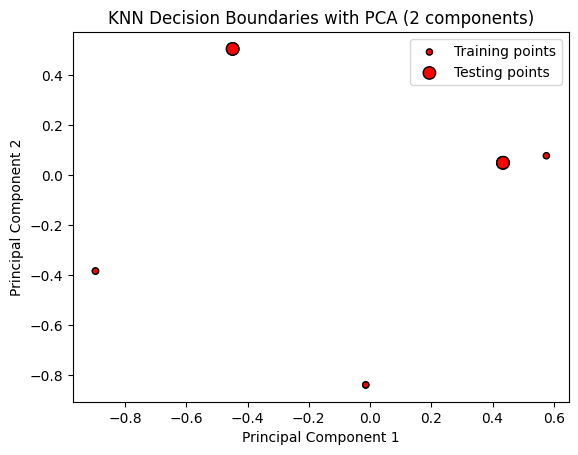

In [30]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FF00', '#0000FF', '#FF0000'])

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Training points')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=80, label='Testing points')

plt.title("KNN Decision Boundaries with PCA (2 components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

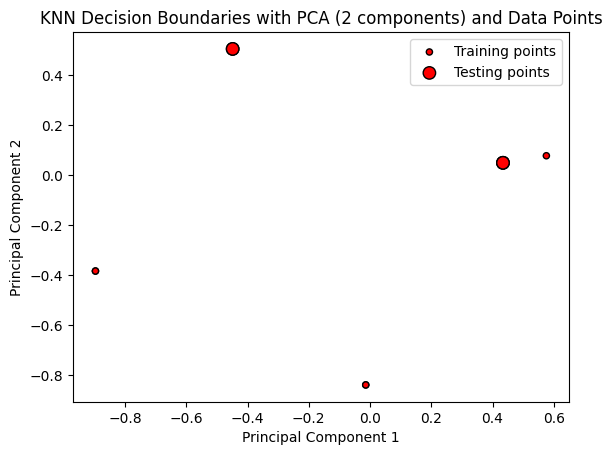

In [31]:
# Create a colormap for the data points
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FF00', '#0000FF', '#FF0000'])

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Training points')

# Plot the testing points, larger than the training points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=80, label='Testing points')

plt.title("KNN Decision Boundaries with PCA (2 components) and Data Points")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

Text(0, 0.5, 'Principal Component 2')

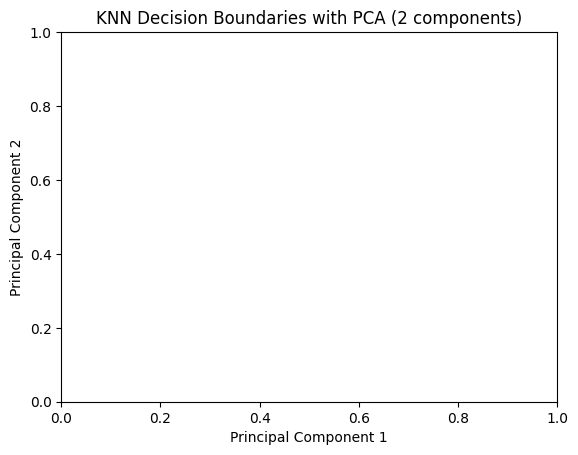

In [32]:
plt.title("KNN Decision Boundaries with PCA (2 components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

1.What are the key hyperparameters in KNN?

  The key hyperparameters in KNN are:

    **k (number of neighbors):** The most important one. Small k can lead to overfitting, while large k can oversmooth the decision boundary.

    **Distance metric:** Defines how we measure similarity between points, e.g., Euclidean or Manhattan distance.

    **Weights:** Whether all neighbors contribute equally (uniform) or closer neighbors get higher influence (distance).

    **Algorithm:** The search strategy for nearest neighbors, like brute, kd_tree, or ball_tree, which can affect performance on large datasets.

2.What distance metrics can be used in KNN?

  The most commonly used distance metrics in KNN are:

    **Euclidean distance** (default, works well in continuous spaces).

    **Manhattan distance** (useful when dealing with high-dimensional or grid-like data).

    **Minkowski distance** (a generalization of Euclidean and Manhattan).

    **Cosine similarity** (good for text or high-dimensional sparse data).

    **Hamming distance** (for categorical or binary features).